In [1]:
import numpy as np
import matplotlib.pyplot as plt

from music import *
from matched_beamforming import *
from utils import *
from flexibeam import *

## Loading data

In [2]:
real_data_folder = "../data/"
real_data_1 = real_data_folder + "data_1.npz"
real_data_2 = real_data_folder + "data_2.npz"

In [3]:
def load_data(data_str):
    npz_data = np.load(data_str)
    return npz_data["XYZ"], npz_data["S"], float(npz_data["T_slot"]), float(npz_data["lambda_"]), npz_data["src_model"]

In [4]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)
antenna_positions

array([[ 0.33684546,  0.        ],
       [ 0.31859424,  0.10937354],
       [ 0.2658184 ,  0.20689476],
       [ 0.184237  ,  0.28199573],
       [ 0.08269067,  0.32653808],
       [-0.02781648,  0.33569496],
       [-0.13530928,  0.30847409],
       [-0.22813922,  0.24782526],
       [-0.29624674,  0.16032072],
       [-0.33225133,  0.05544294],
       [-0.33225133, -0.05544294],
       [-0.29624674, -0.16032072],
       [-0.22813922, -0.24782526],
       [-0.13530928, -0.30847409],
       [-0.02781648, -0.33569496],
       [ 0.08269067, -0.32653808],
       [ 0.184237  , -0.28199573],
       [ 0.2658184 , -0.20689476],
       [ 0.31859424, -0.10937354]])

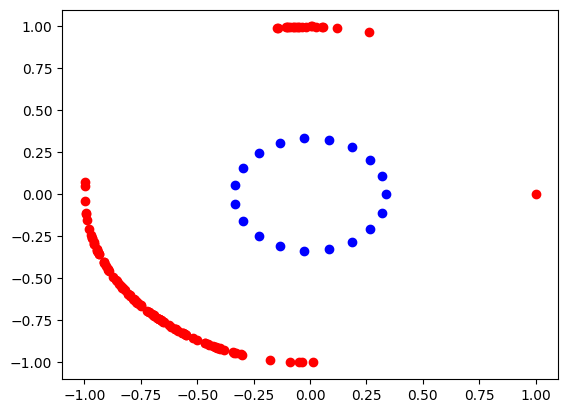

In [5]:
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()

## MUSIC for DOA test

In [6]:
# Parameters for MUSIC

resolution = 0.15
time_t = 0

In [7]:
def plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, nb_doas, time_t, resolution):
    doas, _, _, psd, thetas = music_algorithm(cov[time_t], antenna_positions, wavelength, nb_doas, resolution=resolution)
    thetas *= np.pi/180
    print(doas)
    plt.polar(list(map(cartesian_to_arg,transmitter_positions)), np.ones(len(transmitter_positions)), "go", thetas, psd/np.max(psd), '-k')
    plt.show()

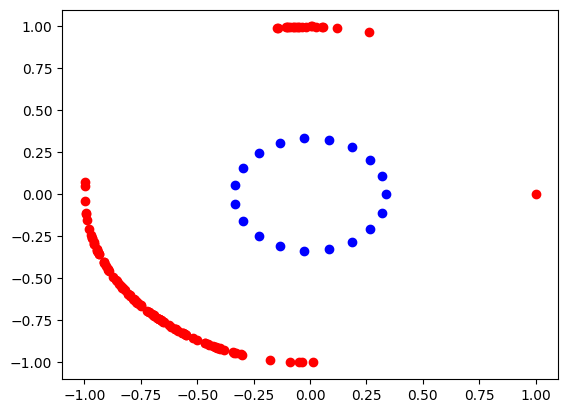

Dataset I
[ 93.3  200.7  224.1  243.9  261.45]


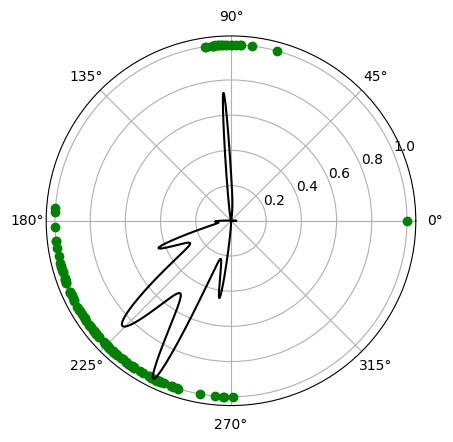

In [8]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)

plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()

print("Dataset I")
plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, 13, time_t, resolution)

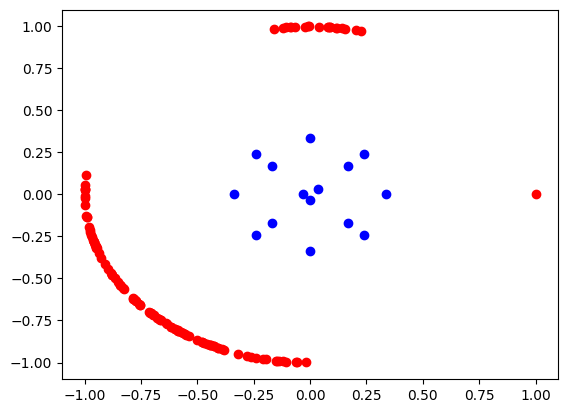

Dataset 2
[ 82.35  93.15 182.1  200.25 222.6  236.85 261.75]


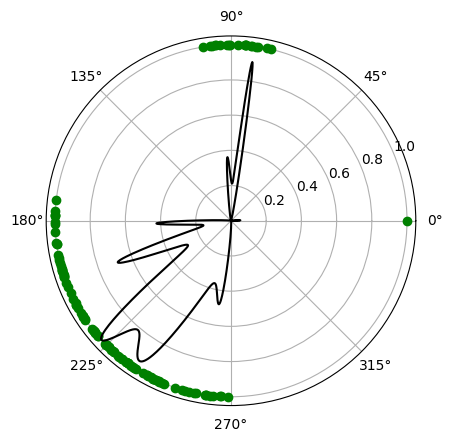

In [9]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)
plt.plot(antenna_positions[:,0],
         antenna_positions[:,1],
         'bo',
         transmitter_positions[:,0],
         transmitter_positions[:,1],
         'ro'
         )
plt.show()
print("Dataset 2")
plot_music_estimation(antenna_positions, cov, wavelength, transmitter_positions, 7, time_t, resolution)

## Matched beamforming test

In [10]:
angle = 224.25
angle = angle * np.pi/180
r0 = np.array([np.cos(angle), np.sin(angle)])
b_gains, ts = matched_beam(antenna_positions, wavelength, r0)

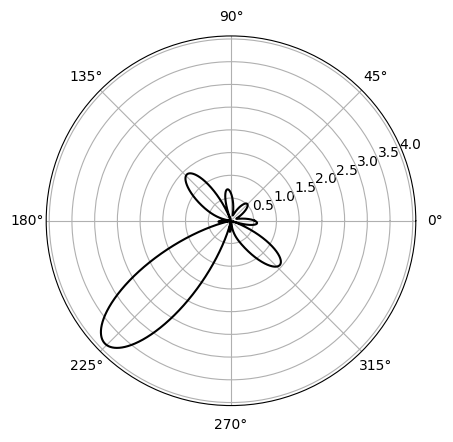

In [11]:
plt.polar(ts, b_gains, '-k')
plt.show()

In [12]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_1)
# 7271317.527537093 for dataset 1
# 6872221.912682234 for dataset 2

In [13]:
average_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

7271317.527537093

In [15]:
antenna_positions, cov, timeslot_durations, wavelength, transmitter_positions = load_data(real_data_2)

In [16]:
average_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

6872221.912682234

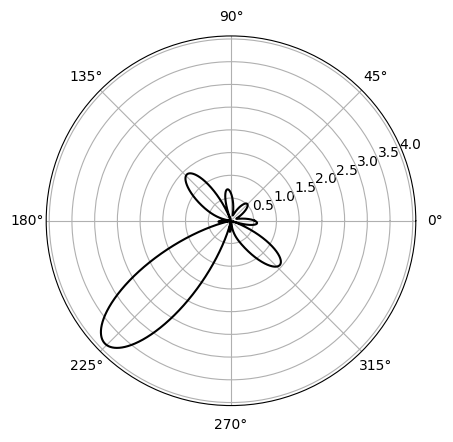

In [18]:
b_gains, ts = matched_beam(antenna_positions, wavelength, r0)
plt.polar(ts, b_gains, '-k')
plt.show()

In [19]:
average_throughput(matched_beam, antenna_positions, wavelength, transmitter_positions)

6872221.912682234

In [22]:
# Using MUSIC to estimate DOAs, dataset 2
doas, _, _, _, _ = music_algorithm(cov[time_t], antenna_positions, wavelength, 7, resolution=resolution)
doas = [np.array([np.cos(t), np.sin(t)]) for t in doas]

In [23]:
average_throughput(matched_beam, antenna_positions, wavelength, doas)

5787971.469670688